C:\Users\Yair\AppData\Local\Temp\ipykernel_3116\427909376.py:85: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = p3.Axes3D(fig)


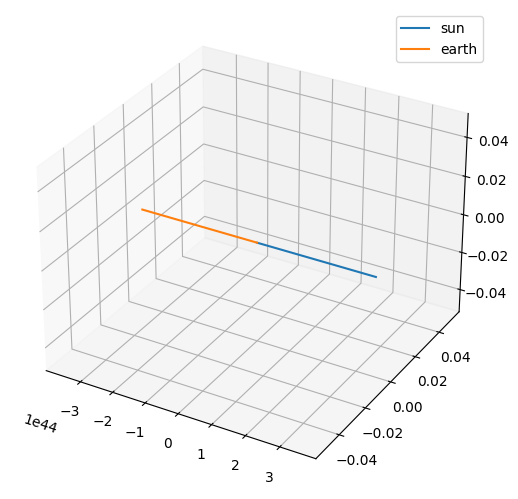

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation


Me = 5.97e24
Msun= 1.989e30
G = 6.6743e-11
AU = 1.5e11

    
def f_true(u_k,index,u_k_l,masses):
    r1 = np.array([u_k[0],u_k[1],u_k[2]])

    atot = np.zeros(3)
    for i in range(len(u_k_l)):
        if i==index:
            continue
        r2 = np.array([u_k_l[i][0],u_k_l[i][1],u_k_l[i][2]])
        rddot = (-G*Me*Msun/(np.linalg.norm(r2-r1)**3))*(r2-r1)
        atot+=rddot
    u_dot = np.array([u_k[3], u_k[4],u_k[5],atot[0],atot[1],atot[2]])
    return u_dot



def rk4(u_k,index, u_k_l, delta_t,masses):
    y1 = delta_t*f_true(u_k,index, u_k_l,masses)
    y2 = delta_t*f_true(u_k+(0.5*y1),index, u_k_l,masses)
    y3 = delta_t*f_true(u_k+(0.5*y2),index, u_k_l,masses)
    y4 = delta_t*f_true(u_k+(y3),index, u_k_l,masses)
    u_kplus1 = u_k + (1/6)*delta_t*(y1+(2*y2)+(2*y3)+y4)
    return u_kplus1


# defining my inputs
u_0 = np.array([[1*AU, 0 ,0,30000,0,0],[0,0,0,0,0,0]]) 
delta_t = 24*60*60
T=365*24*60*60

masses = np.array([Me,Msun])
names = ['earth','sun']


times =int(T/delta_t)


uf = [u_0] # list of updated values 

for i in range(int(T/delta_t)):

    current_body = uf[i]#finds the current body we will plotting the position of
    update = []

    for j in range(len(current_body)):
        update.append(rk4(current_body[j],j,current_body,delta_t,masses)) #appending the current state vector of the body
    update = np.array(update)
    uf.append(update)#adding it to list of state vectors

uf = np.array(uf)#converting from list to a np array

x,y,z=[],[],[]
for i in range(times):
    x.append(uf[i][0][0])
    y.append(uf[i][0][1])
    z.append(uf[i][0][2])

xs,ys,zs=[],[],[]
for i in range(times):
    xs.append(uf[i][1][0])
    ys.append(uf[i][1][1])
    zs.append(uf[i][1][2])

x = np.array(x)
y = np.array(y)
z= np.array(z)

xs = np.array(xs)
ys = np.array(ys)
zs = np.array(zs)


fig = plt.figure()
ax = p3.Axes3D(fig)



plt.plot(x,y,z,label=names[1])
plt.plot(xs,ys,zs,label=names[0])

plt.legend()

plt.show()



